In [1]:
# Create movies of stitched images based on single visiscope files
import numpy as np
import os
from skimage.transform import rescale
import imageio

import cv2
import matplotlib.pyplot as plt

In [36]:
def load_downsampled_img(directory, file_prefix, channel, site, timepoint, downsample_factor):
    filename = os.path.join(directory, file_prefix + '_'+ channel + '_s' + str(site) + '_t' + str(timepoint) + '.tif')
    img = cv2.imread(filename, -1)
#     downsampled = rescale(img, 1.0/downsample_factor, anti_aliasing=False)
    new_size = (int(img.shape[0]/downsample_factor), int(img.shape[1]/downsample_factor))
    downsampled = cv2.resize(img, new_size) #, interpolation=cv2.INTER_NEAREST
    return downsampled

def stitch_img_stack(path, img_prefix, output_name, cols, rows, channel, row_shift = 0, col_shift = 0, 
                     well_start_index = 1, nb_timepoints=120, nb_cols=8, nb_rows=8, 
                     input_img_dim=(2048,2048), downsample_factor=2, max_timepoints_per_file=60):
    '''
    Function stitches multiple images from the visiscope in a horizontal zick-zack fashion in x & y & time 
    and saves the resulting z-stack to a TIFF file
    
    Known limitations: Only coded for wells in which an even number of rows was acquired. 
    Otherwise, the zig-zag stitching is reversed at the moment
    
    '''
    # Processes only max_timepoints_per_file at a time. Saves memory and is needed because imageio can't save TIFF files bigger than 60 GB
    # For saving: Save stack in parts if it contains more than max_timepoints_per_file timepoints
    # if nb_timepoints > max_timepoints_per_file:
    nb_files = int(nb_timepoints/max_timepoints_per_file) + 1
#     nb_timepoints_left = nb_timepoints
    for i in range(1,nb_files):
        max_tp = min(nb_timepoints, i*max_timepoints_per_file)
        tps_in_cycle = max_tp - (i-1)*max_timepoints_per_file
        output_img_dim = (tps_in_cycle, int(input_img_dim[0] * rows/downsample_factor), 
                          int(input_img_dim[1] * cols/downsample_factor))
#         print(nb_timepoints_left)
        
        final_img = np.zeros(output_img_dim)
        
#         tps_in_cycle = min(max_timepoints_per_file, nb_timepoints_left)
        for tp_relative in range(tps_in_cycle):
            tp = tp_relative + (i-1)*max_timepoints_per_file
            print('Current timepoint: ' + str(tp + 1))
            for row in range(rows):
                for col in range(cols):
                    if (row + row_shift) % 2 == 0:
                        current_site = (row + row_shift)*nb_cols + (col + col_shift) + well_start_index
                    else:
                        current_site = (row + row_shift)*nb_cols + (nb_cols - (col + col_shift) - 1) + well_start_index
                    final_img[tp_relative,
                              int(row*input_img_dim[0]/downsample_factor):int((row+1)*input_img_dim[0]/downsample_factor), 
                              int(col*input_img_dim[1]/downsample_factor):int((col+1)*input_img_dim[1]/downsample_factor),
                             ] = load_downsampled_img(path, img_prefix, channel, current_site, tp+1, downsample_factor)
                    
#         subset_img = final_img.astype(np.uint16)[((i-1) * max_timepoints_per_file):(max_tp),:,:]
        imageio.volwrite(output_name + '_' + str(i) + '.tif', final_img.astype(np.uint16))
        
#         nb_timepoints_left = nb_timepoints_left - max_timepoints_per_file
    

In [37]:
# Prepare: Define the parameters
# nb_cols = 8
# nb_rows = 8

folder_path = '/Users/Joel/shares/dataShareJoel/jluethi/20191122-CardiomyocyteDifferentiation-LiveImaging/images/'
prefix = '20191122-Cardiomyocyte_LiveCellImaging_LongTerm1'
output_path = 'wellC04_test2_'
channel_name = 'w1DIC1'

stitch_img_stack(folder_path, prefix, output_path, 2, 2, channel_name, row_shift = 0, col_shift = 0, 
                     well_start_index = 1, nb_timepoints=120, nb_cols=8, nb_rows=8, 
                     input_img_dim=(2048,2048), downsample_factor=4, max_timepoints_per_file=60)

# Part 1: Stitch multiple sites for a given timepoint & downsample
# cols = 3
# rows = 3
# row_shift = 1
# col_shift = 2
# well_start_index = 1
# downsample_factor = 2

# cols = 6
# rows = 6
# row_shift = 1
# col_shift = 1
# well_start_index = 1
# downsample_factor = 4

# nb_timepoints = 120
# input_img_dim = (2048,2048)
# output_img_dim = (nb_timepoints, int(input_img_dim[0] * rows/downsample_factor), int(input_img_dim[1] * cols/downsample_factor))
# print(output_img_dim)
# final_img = np.zeros(output_img_dim)


# for tp in range(nb_timepoints):
#     print(tp)
#     for row in range(rows):
#         for col in range(cols):
#             if (row + row_shift) % 2 == 0:
#                 current_site = (row + row_shift)*nb_cols + (col + col_shift) + well_start_index
#             else:
#                 current_site = (row + row_shift)*nb_cols + (nb_cols - (col + col_shift) - 1) + well_start_index
# #             print(current_site)
#             final_img[tp,
#                       int(row*input_img_dim[0]/downsample_factor):int((row+1)*input_img_dim[0]/downsample_factor), 
#                       int(col*input_img_dim[1]/downsample_factor):int((col+1)*input_img_dim[1]/downsample_factor),
#                      ] = load_downsampled_img(path, prefix, channel, current_site, tp+1, downsample_factor)

        
        
# downsampled_img = load_downsampled_img(path, prefix, channel, current_site, downsample_factor)


(60, 1024, 1024)
Current timepoint: 1
Current timepoint: 2
Current timepoint: 3
Current timepoint: 4
Current timepoint: 5
Current timepoint: 6
Current timepoint: 7
Current timepoint: 8
Current timepoint: 9
Current timepoint: 10
Current timepoint: 11
Current timepoint: 12
Current timepoint: 13
Current timepoint: 14
Current timepoint: 15
Current timepoint: 16
Current timepoint: 17
Current timepoint: 18
Current timepoint: 19
Current timepoint: 20
Current timepoint: 21
Current timepoint: 22
Current timepoint: 23
Current timepoint: 24
Current timepoint: 25
Current timepoint: 26
Current timepoint: 27
Current timepoint: 28
Current timepoint: 29
Current timepoint: 30
Current timepoint: 31
Current timepoint: 32
Current timepoint: 33
Current timepoint: 34
Current timepoint: 35
Current timepoint: 36
Current timepoint: 37
Current timepoint: 38
Current timepoint: 39
Current timepoint: 40
Current timepoint: 41
Current timepoint: 42
Current timepoint: 43
Current timepoint: 44
Current timepoint: 45
Cu

In [7]:
# Old version of stitching function
# def stitch_img_stack(path, img_prefix, output_name, cols, rows, channel, row_shift = 0, col_shift = 0, 
#                      well_start_index = 1, nb_timepoints=120, nb_cols=8, nb_rows=8, 
#                      input_img_dim=(2048,2048), downsample_factor=2, max_timepoints_per_file=60):
#     '''
#     Function stitches multiple images from the visiscope in a horizontal zick-zack fashion in x & y & time 
#     and saves the resulting z-stack to a TIFF file
    
#     '''
#     output_img_dim = (nb_timepoints, int(input_img_dim[0] * rows/downsample_factor), 
#                       int(input_img_dim[1] * cols/downsample_factor))
#     final_img = np.zeros(output_img_dim)
    
#     for tp in range(nb_timepoints):
#         print(tp)
#         for row in range(rows):
#             for col in range(cols):
#                 if (row + row_shift) % 2 == 0:
#                     current_site = (row + row_shift)*nb_cols + (col + col_shift) + well_start_index
#                 else:
#                     current_site = (row + row_shift)*nb_cols + (nb_cols - (col + col_shift) - 1) + well_start_index
#                 final_img[tp,
#                           int(row*input_img_dim[0]/downsample_factor):int((row+1)*input_img_dim[0]/downsample_factor), 
#                           int(col*input_img_dim[1]/downsample_factor):int((col+1)*input_img_dim[1]/downsample_factor),
#                          ] = load_downsampled_img(path, img_prefix, channel, current_site, tp+1, downsample_factor)

#     # For saving: Save stack in parts if it contains more than max_timepoints_per_file timepoints
#     # if nb_timepoints > max_timepoints_per_file:
#     nb_files = int(nb_timepoints/max_timepoints_per_file) + 1
#     for i in range(1,nb_files):
#         max_tp = min(nb_timepoints, i*max_timepoints_per_file)
#         subset_img = final_img.astype(np.uint16)[((i-1) * max_timepoints_per_file):(max_tp),:,:]
#         imageio.volwrite(output_name + '_' + str(i) + '.tif', subset_img)

# Save image
# test_output = final_img.astype(np.uint16)
# print(test_output.dtype)
# cv2.imwrite('test.png', test_output)
# subset_img = final_img.astype(np.uint16)[60:,:,:]
# print(subset_img.shape)
# imageio.volwrite('wellB02_2x_r2_c3_secondHalf.tif', subset_img)

(60, 3072, 3072)


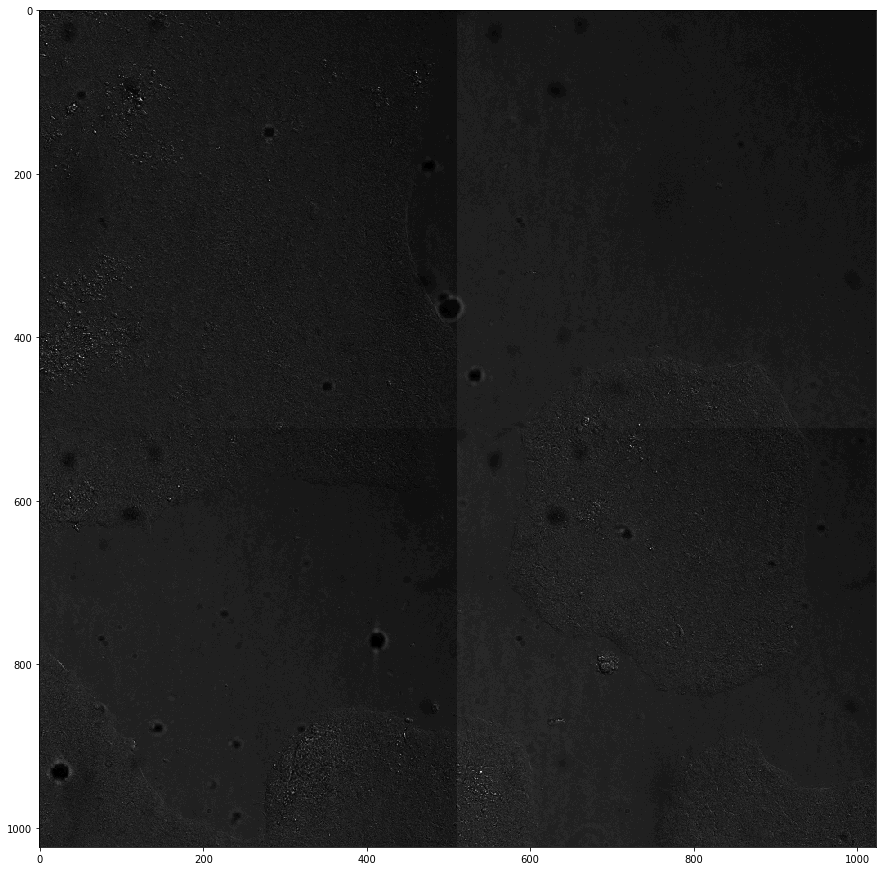

In [64]:
plt.figure(figsize=(15,20))
imgplot = plt.imshow(final_img, 'gray')

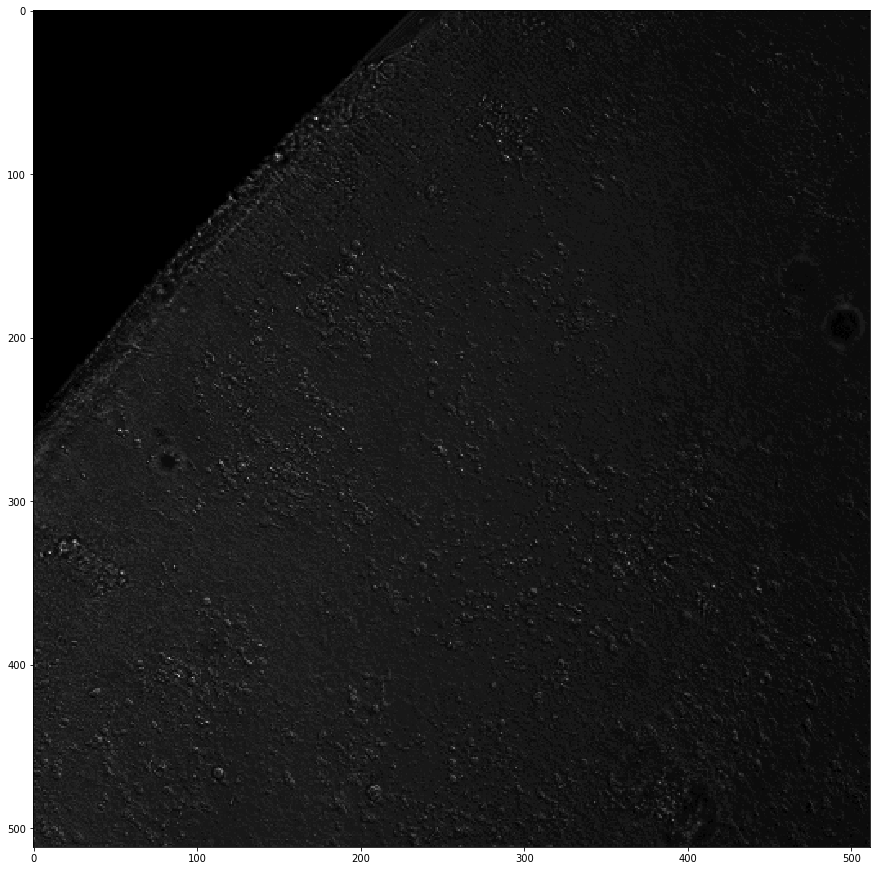

In [31]:
plt.figure(figsize=(15,20))
imgplot = plt.imshow(downsampled, 'gray')

In [65]:
print(final_img.dtype)

float64
